## Imports and loading the datasets

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import string

In [2]:
TheNumbers = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')

In [3]:
RTinfo = pd.read_csv('./zippedData/rt.movie_info.tsv.gz', sep='\t')

In [4]:
RTreviews = pd.read_csv('./zippedData/rt.reviews.tsv.gz', sep='\t', encoding = 'unicode_escape')

## Rotten Tomatoes Movie Info datset

In [5]:
RTinfo.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [6]:
RTinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


### Discovery
Need to discover where the nulls are, convert string numbers to values. Looks like a lot of the Studio values are missing. Currency and box office seem to appear in the same entries, but only for like 20% of the data

### How I might use this data

Would probably compare all other columns to box office, with exception of synopsis, id, and possibly dvd date

### Cleaning the data

## Rotten Tomatoes Reviews dataset

In [7]:
pd.set_option('display.max_rows', 100)
RTreviews.head(100)


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


In [8]:
pd.set_option('display.max_rows', 10)

In [9]:
RTreviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


### Discovery
Rating is not currently a value, will need to be converted to become useful. Many ratings are NaN and will need to be dropped, and many other ratings are letters and will need to be dropped. ratings are sometimes on a different scale (read:denominator), but can be converted to real numbers.

Fresh or rotten seems to exist for each entry

Dates are also strings and need to be normalized to be used

Can id be traced to which movie it represents?

May want a new group for just reviews by top critics

### How I might use this data
Honestly, not sure what I'd do with this data. First thing would probably be to group ids with ratings and fresh indicator, and go from there. Not sure if id can be traced back to the movie title, but the id seem to correspond to individual movies.

### Cleaning the data

## The Number dataset

In [9]:
TheNumbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [10]:
TheNumbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Discovery
All entries in this dataset are non-null. However, all values are strings

### How I might use this data
I will compare release date (as dependent variable) to domestic gross & worldwide gross. And do the same comparison for production budget

### Cleaning the data

In [11]:
punct = '$,'   # `|` is not present here
money_to_num = str.maketrans(dict.fromkeys(punct, ''))

#stripping dollar-sign and commas from relevant objects
TheNumbers['worldwide_gross'] = '|'.join(TheNumbers['worldwide_gross'].tolist()).translate(money_to_num).split('|')
TheNumbers['domestic_gross'] = '|'.join(TheNumbers['domestic_gross'].tolist()).translate(money_to_num).split('|')
TheNumbers['production_budget'] = '|'.join(TheNumbers['production_budget'].tolist()).translate(money_to_num).split('|')

In [12]:
#converting number strings to int64 types
TheNumbers['worldwide_gross'] = TheNumbers['worldwide_gross'].astype(np.int64)
TheNumbers['domestic_gross'] = TheNumbers['domestic_gross'].astype(np.int64)
TheNumbers['production_budget'] = TheNumbers['production_budget'].astype(np.int64)

In [13]:
#convert release date to a datetime
TheNumbers['release_date'] = pd.to_datetime(TheNumbers['release_date'])

### New Metrics


In [14]:
#created variables for domestic profit, worldwide profit, domestic & worldwide profit margins (profit/gross)
TheNumbers['domestic_profit'] = TheNumbers['domestic_gross'] - TheNumbers['production_budget']
TheNumbers['worldwide_profit'] = TheNumbers['worldwide_gross'] - TheNumbers['production_budget']
TheNumbers['domestic_margin'] = TheNumbers['domestic_profit'] / TheNumbers['domestic_gross']
TheNumbers['worldwide_margin'] = TheNumbers['worldwide_profit'] / TheNumbers['worldwide_gross']

In [44]:
TheNumbers['calendar_day'] = TheNumbers['release_date'].astype(str)

In [55]:
TheNumbers['calendar_day'][0] = TheNumbers['calendar_day'][0][-5:]

C:\Users\FIDataSci.DESKTOP-5QIEL80\AppData\Local\Temp\ipykernel_20724\2429170339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TheNumbers['calendar_day'][0] = TheNumbers['calendar_day'][0][-5:]


In [63]:
#for date in TheNumbers['calendar_day']:
 #   TheNumbers['calendar_day'][date] = TheNumbers['calendar_day'][date][-5:]
    
[TheNumbers['calendar_day'][date][-5:] for TheNumbers['calendar_day'][date] in TheNumbers['calendar_day'] ]

C:\Users\FIDataSci.DESKTOP-5QIEL80\AppData\Local\Temp\ipykernel_20724\2868340058.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  [TheNumbers['calendar_day'][date][-5:] for TheNumbers['calendar_day'][date] in TheNumbers['calendar_day'] ]


KeyError: '12-18'

In [62]:
TheNumbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_margin,worldwide_margin,calendar_day
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,335507625,2351345279,0.441163,0.846921,12-18
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,-0.703283,0.607331,2011-05-20
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-7.184770,-1.337036,2019-06-07
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,0.279748,0.764364,2015-05-01
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,0.488859,0.759251,2017-12-15


In [16]:
TheNumbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
 6   domestic_profit    5782 non-null   int64         
 7   worldwide_profit   5782 non-null   int64         
 8   domestic_margin    5782 non-null   float64       
 9   worldwide_margin   5782 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 451.8+ KB


## Metrics we want to prioritize

Release date to Profit (domestic & worldwide, profit margin)
Production budget to profit (domestic & worldwide) as well as relationships between production budget & genre, 
and production budget & actors, how production budget correlates to gross vs profit
Large budget profits vs small budget profits

## Some exploratory analysis

### Looking at relationships between production budget & profit metrics, also production budget & revenues

Text(0.5, 1.0, 'Budget v Domestic Profit')

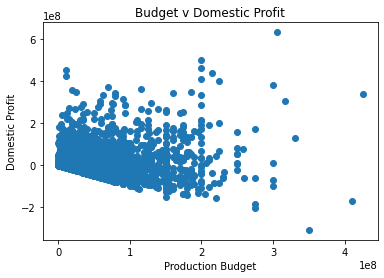

In [27]:
# plot of budget v domestic profit
fig, ax = plt.subplots()


plt.scatter(TheNumbers['production_budget'], TheNumbers['domestic_profit'])


ax.set_xlabel('Production Budget')
ax.set_ylabel('Domestic Profit')

# Add a title for the plot
ax.set_title('Budget v Domestic Profit')

# Add a legend to the plot with legend() in lower right corner
#ax.legend(["Sample Data"], loc=4);

In [26]:
#correlation between production budget and domestic profit
TheNumbers['production_budget'].corr(TheNumbers['domestic_profit'])

0.09974209165512299

Text(0.5, 1.0, 'Budget v Worldwide Profit')

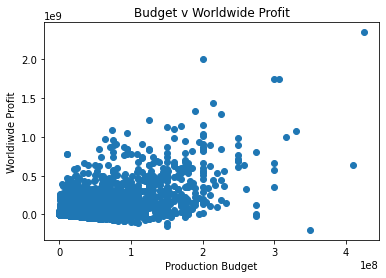

In [29]:
# plot of budget v worldwide profit
fig, ax = plt.subplots()


plt.scatter(TheNumbers['production_budget'], TheNumbers['worldwide_profit'])


ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldiwde Profit')

# Add a title for the plot
ax.set_title('Budget v Worldwide Profit')

# Add a legend to the plot with legend() in lower right corner
#ax.legend(["Sample Data"], loc=4);

In [31]:
#correlation between production budget and domestic profit
TheNumbers['production_budget'].corr(TheNumbers['worldwide_profit'])

0.608752147171885

Text(0.5, 1.0, 'Budget v Domestic Profit Margin')

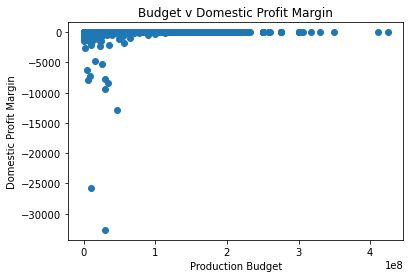

In [30]:
#plot of budget v domestic profit margin
fig, ax = plt.subplots()


plt.scatter(TheNumbers['production_budget'], TheNumbers['domestic_margin'])


ax.set_xlabel('Production Budget')
ax.set_ylabel('Domestic Profit Margin')

# Add a title for the plot
ax.set_title('Budget v Domestic Profit Margin')

# Add a legend to the plot with legend() in lower right corner
#ax.legend(["Sample Data"], loc=4);

In [33]:
#correlation between production budget & domestic profit margin
TheNumbers['production_budget'].corr(TheNumbers['domestic_margin'])

nan

Text(0.5, 1.0, 'Budget v Worldwide Profit Margin')

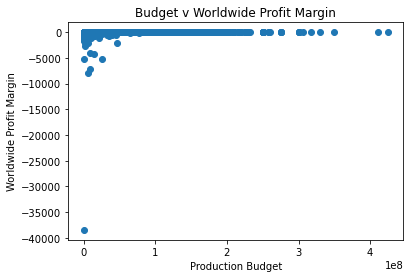

In [34]:
#plot of budget v worldwide profit margin
fig, ax = plt.subplots()


plt.scatter(TheNumbers['production_budget'], TheNumbers['worldwide_margin'])


ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide Profit Margin')

# Add a title for the plot
ax.set_title('Budget v Worldwide Profit Margin')

# Add a legend to the plot with legend() in lower right corner
#ax.legend(["Sample Data"], loc=4);

In [35]:
#correlation between production budget & domestic profit margin
TheNumbers['production_budget'].corr(TheNumbers['worldwide_margin'])

nan

Text(0.5, 1.0, 'Budget v Domestic Gross')

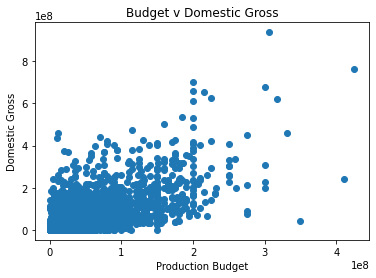

In [36]:
# plot of budget v domestic gross
fig, ax = plt.subplots()


plt.scatter(TheNumbers['production_budget'], TheNumbers['domestic_gross'])


ax.set_xlabel('Production Budget')
ax.set_ylabel('Domestic Gross')

# Add a title for the plot
ax.set_title('Budget v Domestic Gross')

# Add a legend to the plot with legend() in lower right corner
#ax.legend(["Sample Data"], loc=4);

In [37]:
#correlation between production budget and domestic gross
TheNumbers['production_budget'].corr(TheNumbers['domestic_gross'])

0.6856818396752741

Text(0.5, 1.0, 'Budget v Worldwide Gross')

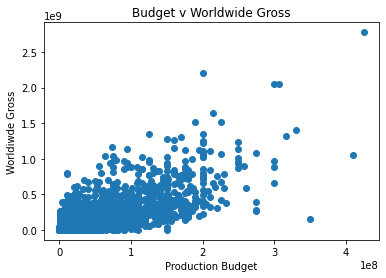

In [38]:
# plot of budget v worldwide gross
fig, ax = plt.subplots()


plt.scatter(TheNumbers['production_budget'], TheNumbers['worldwide_gross'])


ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldiwde Gross')

# Add a title for the plot
ax.set_title('Budget v Worldwide Gross')

# Add a legend to the plot with legend() in lower right corner
#ax.legend(["Sample Data"], loc=4);

In [39]:
#correlation between production budget and worldwide gross
TheNumbers['production_budget'].corr(TheNumbers['worldwide_gross'])

0.7483059765694756